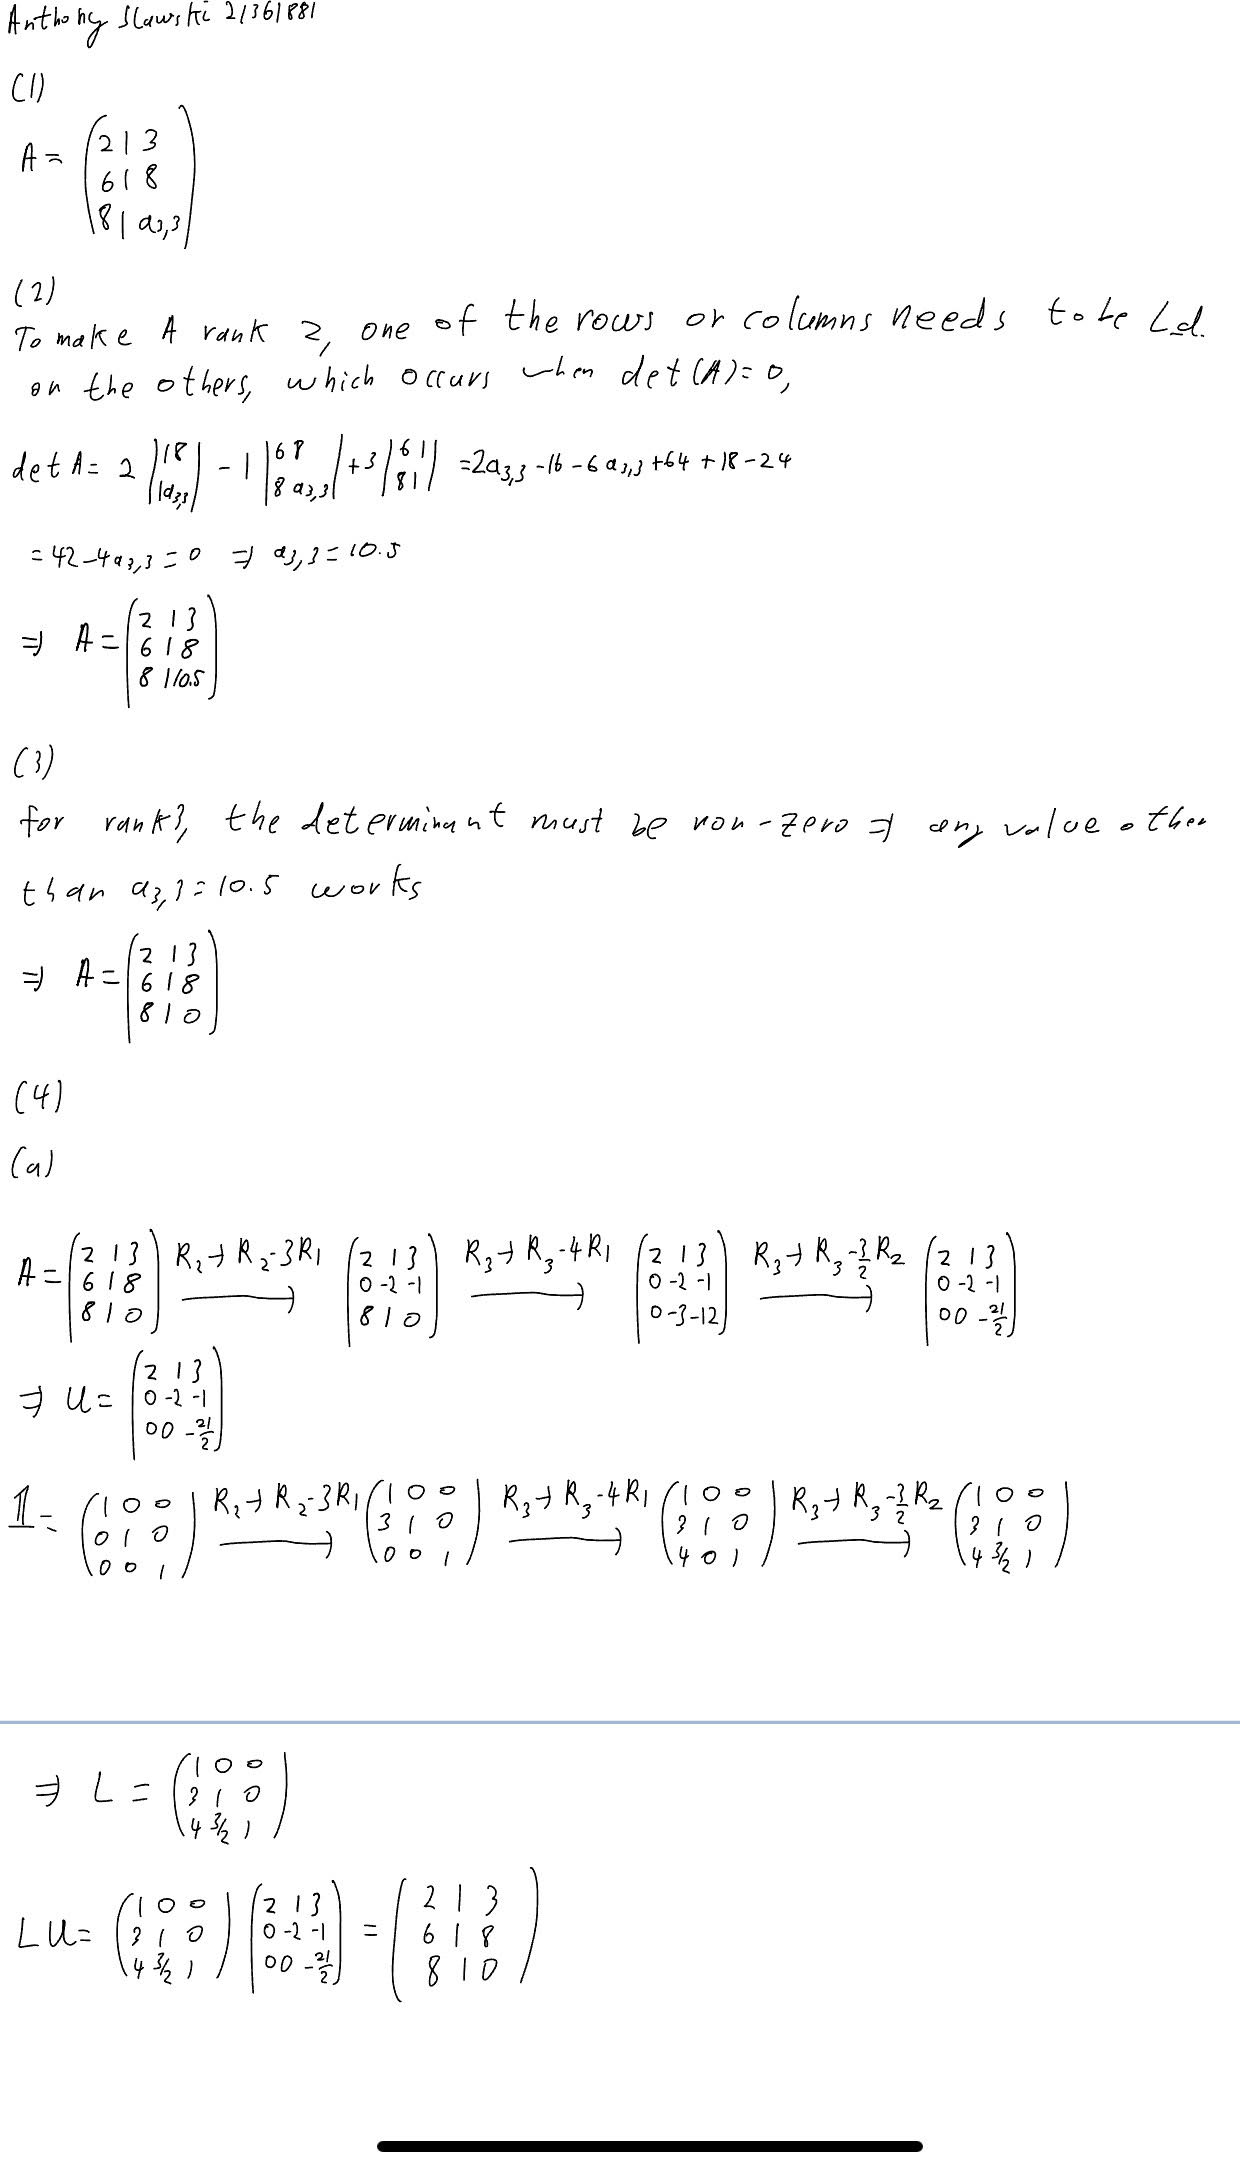

In [128]:
from IPython.display import Image
Image('1_3.jpg')

4b

In [4]:
import numpy as np

A = np.array([[2,1,3],[6,1,8],[8,1,0]])
n = 3
U = np.array(A, dtype=float)
y = np.array(b, dtype=float)
L = np.identity(n)

# loop over columns and transform to get zeros below the pivot
for k in range(0,n):
    # loop over all rows below the pivot
    for i in range(k + 1, n):
        # Store the multiplication factors in the matrix L
        L[i,k] = U[i,k] / U[k,k]
        U[i,:] = U[i,:] - L[i,k] * U[k,:]
        y[i] = y[i] - L[i,k] * y[k]
print(U,'\n',L)

[[  2.    1.    3. ]
 [  0.   -2.   -1. ]
 [  0.    0.  -10.5]] 
 [[1.  0.  0. ]
 [3.  1.  0. ]
 [4.  1.5 1. ]]


4c

In [12]:
import numpy as np
#matrix size
n=3
# elementary matrix that multiplies row i by a scalar c
def E1(i,c):
    e1 = np.identity(n)
    e1[i, i] = c
    return e1
# elementary matrix that adds c times row j to row i
def E2(i,j,c):
    e2 = np.identity(n)
    e2[i, j] = c
    return e2
#  elementary matrix that swaps rows i and j
def E3(i,j):
    e3 = np.identity(n)
    e3[i, i] = 0
    e3[j, j] = 0
    e3[i, j] = 1
    e3[j, i] = 1
    return e3
E2(1,0,-3)@A

array([[ 2.,  1.,  3.],
       [ 0., -2., -1.],
       [ 8.,  1.,  0.]])

In [13]:
E2(2,0,-4)@E2(1,0,-3)@A

array([[  2.,   1.,   3.],
       [  0.,  -2.,  -1.],
       [  0.,  -3., -12.]])

In [19]:
# upper triangular U after applying Gaussian elimination steps defined on paper 
U=E2(2,1,-3/2)@E2(2,0,-4)@E2(1,0,-3)@A

#L found by applying the inverses of the operations used to construct U

L=E2(1,0,3)@E2(2,0,4)@E2(2,1,3/2)
print(U,'\n',L)
print(L@U)

[[  2.    1.    3. ]
 [  0.   -2.   -1. ]
 [  0.    0.  -10.5]] 
 [[1.  0.  0. ]
 [3.  1.  0. ]
 [4.  1.5 1. ]]
[[2. 1. 3.]
 [6. 1. 8.]
 [8. 1. 0.]]


4d

In [23]:
from scipy.linalg import lu
P, L, U = lu(A)
A_new = P@(L@U)
print(A_new)

[[2. 1. 3.]
 [6. 1. 8.]
 [8. 1. 0.]]


5a

In [25]:
from numpy.linalg import norm
# decompose matrix A into its columns
(a1, a2, a3) = np.transpose(A)

# Orthogonalization of vectors
u1 = a1
e1 = u1 / norm(u1)

u2 = a2 - (e1@a2)*e1
e2 = u2/norm(u2)

u3 = a3 - (e1@a3)*e1
u3 = u3 - (e2@a3)*e2
e3 = u3 / norm(u3)

# Q's columns are the orthonormal vectors e1, e2, and e3
Q = np.transpose([e1, e2, e3])

# R  Q.T @ A since A = Q @ R in the QR decomposition
R = Q.T@A

print(Q,'\n',R)
print(Q@R)

[[ 0.19611614  0.94345635 -0.26726124]
 [ 0.58834841  0.10482848  0.80178373]
 [ 0.78446454 -0.31448545 -0.53452248]] 
 [[ 1.01980390e+01  1.56892908e+00  5.29513565e+00]
 [-2.22044605e-15  7.33799386e-01  3.66899693e+00]
 [-1.77635684e-15 -1.11022302e-16  5.61248608e+00]]
[[2.00000000e+00 1.00000000e+00 3.00000000e+00]
 [6.00000000e+00 1.00000000e+00 8.00000000e+00]
 [8.00000000e+00 1.00000000e+00 9.77131685e-16]]


5b

In [28]:
# first Householder vector for column a1
u1 = a1 - norm(a1)*np.array([1,0,0])
v1 = u1/norm(u1)

#first Householder matrix H1
H1 = np.identity(3) - 2*np.outer(v1,v1)
# Apply first Householder to  A
A1 = H1@A

#same for next 2, after last H applied
a2 = A1[1:,1]
u2 = a2 - (-np.sign(a2[0]))*norm(a2)*np.array([1,0])
v2 = u2/norm(u2)
H2 = np.identity(3)
H2[1:,1:] -= 2*np.outer(v2,v2)
A2 = H2@A1

a3 = A2[2:,2]
u3 = a3 - (-np.sign(a3[0]))*norm(a3)*np.array([1])
v3 = u3/norm(u3)
H3 = np.identity(3)
H3[2:,2:] -= 2*np.outer(v3,v3)

A3 = H3@A2

# R upper triangular is the result after applying all Householders
R=A3

#Q is the product of the Householder
Q_Householder = np.transpose(H3@H2@H1)
print(Q_Householder,'\n',R)
print(Q_Householder@R)

[[ 0.19611614 -0.94345635 -0.26726124]
 [ 0.58834841 -0.10482848  0.80178373]
 [ 0.78446454  0.31448545 -0.53452248]] 
 [[ 1.01980390e+01  1.56892908e+00  5.29513565e+00]
 [ 0.00000000e+00 -7.33799386e-01 -3.66899693e+00]
 [ 0.00000000e+00 -4.56237811e-17  5.61248608e+00]]
[[2.00000000e+00 1.00000000e+00 3.00000000e+00]
 [6.00000000e+00 1.00000000e+00 8.00000000e+00]
 [8.00000000e+00 1.00000000e+00 2.22335394e-15]]


5c

In [98]:
import numpy.linalg as npl
(Q,R) = npl.qr(A)
print(Q,'\n',R)
print(Q@R)

[[-0.19611614  0.94345635  0.26726124]
 [-0.58834841  0.10482848 -0.80178373]
 [-0.78446454 -0.31448545  0.53452248]] 
 [[-10.19803903  -1.56892908  -5.29513565]
 [  0.           0.73379939   3.66899693]
 [  0.           0.          -5.61248608]]
[[ 2.00000000e+00  1.00000000e+00  3.00000000e+00]
 [ 6.00000000e+00  1.00000000e+00  8.00000000e+00]
 [ 8.00000000e+00  1.00000000e+00 -1.80411107e-15]]


6a

In [122]:
from numpy.linalg import eig

# get Compute A^T A and A A^T
AtA = A.T @ A
AAt = A @ A.T

# get eigenvalues and eigenvectors
AtA_ev, V = eig(AtA)  # Right singular vectors (V)
AAt_ev, U = eig(AAt)  # Left singular vectors (U)

# Sort eigenvalues and corresponding eigenvectors in descending order
indices = np.argsort(-AtA_ev)
AtA_ev = AtA_ev[indices]  # Sorted eigenvalues
V = V[:, indices]  # Sorted eigenvectors V

indices = np.argsort(-AAt_ev)
AAt_ev = AAt_ev[indices]
U = U[:,indices]

sig=np.sqrt(AtA_ev)*np.identity(3)
print(U,'\n\n',sig,'\n\n',V)
print(U @ sig @ V.T)

[[ 0.28874629 -0.20779505  0.93458376]
 [ 0.79520723 -0.49156412 -0.35497913]
 [ 0.53317075  0.84568666  0.02330281]] 

 [[12.13624889  0.          0.        ]
 [ 0.          5.68692758  0.        ]
 [ 0.          0.          0.60853718]] 

 [[ 0.79218068  0.59795354  0.12207101]
 [ 0.13324745  0.0257305  -0.99074874]
 [ 0.59556266 -0.80111766  0.05929258]]
[[ 2.13885064e+00 -1.26935005e-01  3.06744282e+00]
 [ 5.94726093e+00  1.42803911e+00  7.97438347e+00]
 [ 8.00346209e+00  9.71901123e-01  1.68161200e-03]]


6b

In [123]:
U, sig, Vt = np.linalg.svd(A)
sig=np.identity(3)*sig
print(U,'\n\n',sig,'\n\n',Vt.T)
print(U @ sig @ Vt)

[[-0.28874629 -0.20779505 -0.93458376]
 [-0.79520723 -0.49156412  0.35497913]
 [-0.53317075  0.84568666 -0.02330281]] 

 [[12.13624889  0.          0.        ]
 [ 0.          5.68692758  0.        ]
 [ 0.          0.          0.60853718]] 

 [[-0.79218068  0.59795354  0.12207101]
 [-0.13324745  0.0257305  -0.99074874]
 [-0.59556266 -0.80111766  0.05929258]]
[[ 2.00000000e+00  1.00000000e+00  3.00000000e+00]
 [ 6.00000000e+00  1.00000000e+00  8.00000000e+00]
 [ 8.00000000e+00  1.00000000e+00 -8.45359739e-16]]


7a

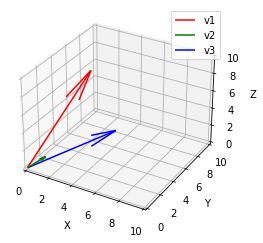

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#  columns of A
v1 = A[:, 0]
v2 = A[:, 1]
v3 = A[:, 2]

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = [0, 0, 0]

# Plot vectors
ax.quiver(*origin, *v1, color='r', label='v1')
ax.quiver(*origin, *v2, color='g', label='v2')
ax.quiver(*origin, *v3, color='b', label='v3')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])

ax.legend()

plt.show()


7b

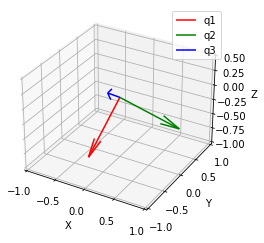

In [119]:
# columns of Q, orthogonal vectors
q1 = Q[:, 0]
q2 = Q[:, 1]
q3 = Q[:, 2]

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = [0, 0, 0]

# Plot 
ax.quiver(*origin, *q1, color='r', label='q1')
ax.quiver(*origin, *q2, color='g', label='q2')
ax.quiver(*origin, *q3, color='b', label='q3')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 0.5])

ax.legend()

plt.show()


7c

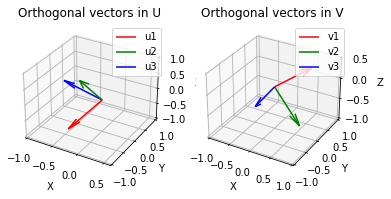

In [127]:
# columns of U and V
u1 = U[:, 0]
u2 = U[:, 1]
u3 = U[:, 2]

v1 = V[:, 0]
v2 = V[:, 1]
v3 = V[:, 2]

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

# Plot 
ax.quiver(0, 0, 0, *u1, color='r', label='u1')
ax.quiver(0, 0, 0, *u2, color='g', label='u2')
ax.quiver(0, 0, 0, *u3, color='b', label='u3')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-1, 0.6])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

 #title
ax.set_title('Orthogonal vectors in U')
ax.legend()

# V
ax2 = fig.add_subplot(122, projection='3d')

ax2.quiver(0, 0, 0, *v1, color='r', label='v1')
ax2.quiver(0, 0, 0, *v2, color='g', label='v2')
ax2.quiver(0, 0, 0, *v3, color='b', label='v3')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 0.5])


ax2.set_title('Orthogonal vectors in V')
ax2.legend()

plt.show()
